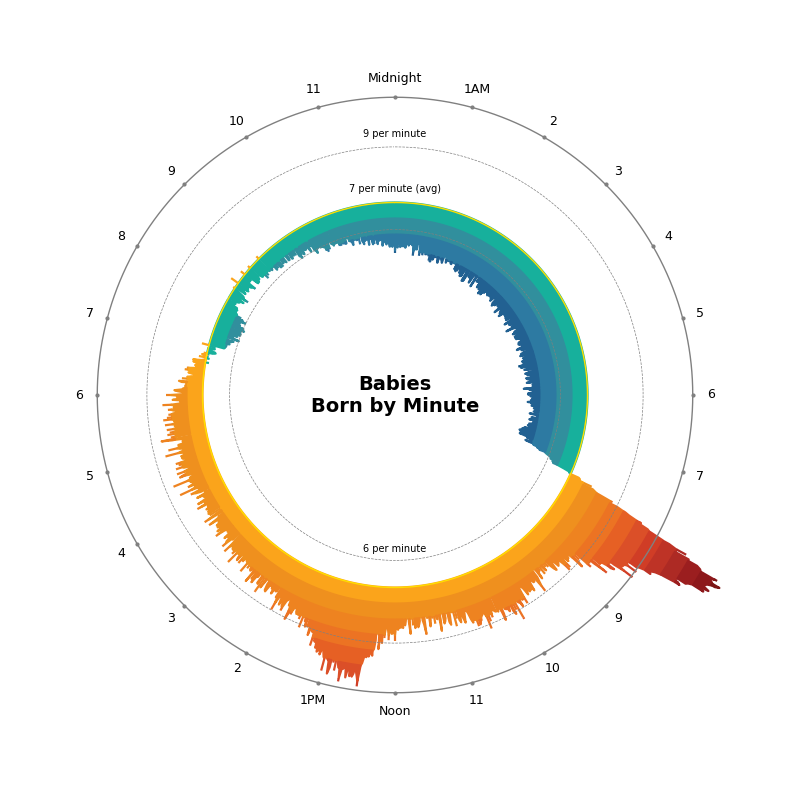

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

df = pd.read_csv('births.csv')

def time_to_minutes(t):
    hours, minutes = map(int, t.split(':'))
    return hours * 60 + minutes

df['minute'] = df['time'].apply(time_to_minutes)
births = df.groupby('minute').size()
all_minutes = pd.Series(np.arange(1440), name='minute')
births = births.reindex(all_minutes, fill_value=0)
birth_rate = births / 365.0


angles = (all_minutes / 1440.0) * 2 * np.pi

avg_birth = 3.67e6 / (1440 * 365)
step = 0.25 * avg_birth
band_delta = step / 3


lower_threshold = avg_birth - step
upper_threshold = avg_birth + step


below_colors = ['#17B09C', '#318F9D', '#2D7AA2', '#226192', '#094E81']
above_colors = ['#FBA41B', '#EF901E', '#EE8320', '#EC7323', '#E66024',
                '#DB4F28', '#D03D26', '#BE3326', '#AD2A24', '#9B1E1F',
                '#8D181B', '#7B1515']


full_lower = avg_birth - len(below_colors) * band_delta
full_upper = avg_birth + len(above_colors) * band_delta


fig, ax = plt.subplots(figsize=(10,10), subplot_kw={'projection': 'polar'}, facecolor='white')
ax.set_facecolor('white')
ax.set_xticklabels([])


hours = range(24)
angles_for_hours = [(h*60)/1440 * 2*np.pi for h in hours]
hour_labels = [
    'Midnight' if h == 0 else
    'Noon' if h == 12 else
    '1AM' if h == 1 else
    '1PM' if h == 13 else
    '' if h == 8 else
    f"{h}" if h < 12 else f"{h-12}"
    for h in hours
]


clock_radius = full_upper - 2.5
for angle, label in zip(angles_for_hours, hour_labels):
    txt = ax.text(angle, clock_radius, label, ha='center', va='center',
                  fontsize=9, color='black', zorder=10)
    txt.set_bbox(dict(facecolor='none', edgecolor='none', pad=1))


ax.set_ylim(0, full_upper)
ax.grid(False)


for i, col in enumerate(below_colors):
    band_lower_i = avg_birth - (i + 1) * band_delta
    band_upper_i = avg_birth - i * band_delta
    y1 = np.maximum(birth_rate, band_lower_i)
    y2 = np.minimum(avg_birth, band_upper_i)
    mask = (birth_rate < avg_birth) & (y1 < y2)
    ax.fill_between(angles, y1, y2, where=mask,
                    color=col, alpha=1.0,
                    edgecolor=col, linewidth=1.6,
                    zorder=2)


for i, col in enumerate(above_colors):
    band_lower_i = avg_birth + i * band_delta
    band_upper_i = avg_birth + (i + 1) * band_delta
    y1 = np.maximum(avg_birth, band_lower_i)
    y2 = np.minimum(birth_rate, band_upper_i)
    mask = (birth_rate > avg_birth) & (y1 < y2)
    ax.fill_between(angles, y1, y2, where=mask,
                    color=col, alpha=1.0,
                    edgecolor=col, linewidth=1.6,
                    zorder=2)


mask_extra_below = birth_rate < full_lower
if mask_extra_below.any():
    ax.fill_between(angles, birth_rate, full_lower,
                    where=mask_extra_below,
                    color=below_colors[-1],
                    alpha=1.0,
                    edgecolor=below_colors[-1], linewidth=2,
                    zorder=2)


mask_extra_above = birth_rate > full_upper
if mask_extra_above.any():
    ax.fill_between(angles, full_upper, birth_rate,
                    where=mask_extra_above,
                    color=above_colors[-1],
                    alpha=1.0,
                    edgecolor=above_colors[-1], linewidth=2,
                    zorder=2)


ax.set_yticklabels([])


ax.plot(angles, np.full_like(angles, avg_birth), color='#FFDE00', lw=1, linestyle='-',
        zorder=3, clip_on=False)
ax.plot(angles, np.full_like(angles, 6), color='grey', lw=0.5, linestyle='--',
        zorder=3, clip_on=False)
ax.plot(angles, np.full_like(angles, 9), color='grey', lw=0.5, linestyle='--',
        zorder=3, clip_on=False)
ax.plot(angles, np.full_like(angles, 10.8), color='grey', lw=1, linestyle='-',
        zorder=3, clip_on=False)
dot_angles = [angle for angle, label in zip(angles_for_hours, hour_labels) if label != '']
dot_radii = np.full(len(dot_angles), 10.8)

ax.plot(dot_angles, dot_radii, linestyle='None', marker='o', color='grey',
        markersize=2, zorder=4, clip_on=False)


offset = 0.3
ax.text(0, 9 + offset, "9 per minute", ha='center', va='bottom',
        fontsize=7, color='black', zorder=5)
ax.text(0, avg_birth + offset, "7 per minute (avg)", ha='center', va='bottom',
        fontsize=7, color='black', zorder=5)
ax.text(0, 0, "Babies\nBorn by Minute", ha='center', va='center',
        fontsize=14, color='black', zorder=5, weight='bold')
ax.text(0.5, 0.30, "6 per minute", transform=ax.transAxes, ha='center', va='center',
        fontsize=7, color='black', zorder=5)


ax.set_theta_direction(-1)
ax.set_theta_zero_location('N')
ax.spines['polar'].set_visible(False)

plt.show()


In [ ]:
'''Attributes
CHAT GPT for alignment issues
CHAT GPT for fixing bugs regarding gradient steps
'''
